# Reliance Industries Stock Market Analysis of January-2024
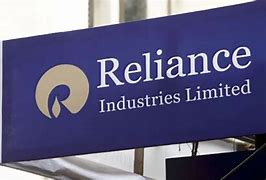

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('RELIANCE.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-02,2318.0,2348.000000,2311.000000,2326.949951,2318.759033,6305317
1,2023-02-03,2349.0,2349.000000,2293.000000,2329.000000,2320.802002,11398850
2,2023-02-06,2315.0,2321.000000,2305.800049,2311.449951,2303.313721,6847679
3,2023-02-07,2312.0,2327.399902,2293.000000,2305.899902,2297.783203,6985001
4,2023-02-08,2313.0,2359.899902,2307.000000,2351.949951,2343.671143,9765490


In [3]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       246 non-null    object 
 1   Open       246 non-null    float64
 2   High       246 non-null    float64
 3   Low        246 non-null    float64
 4   Close      246 non-null    float64
 5   Adj Close  246 non-null    float64
 6   Volume     246 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


# Data consistency
### Note:
- column Date is in object data type but it should be in datetime format.
- Extract day, month and year from the date column and create new column for each


In [4]:
# change datatype of date column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       246 non-null    datetime64[ns]
 1   Open       246 non-null    float64       
 2   High       246 non-null    float64       
 3   Low        246 non-null    float64       
 4   Close      246 non-null    float64       
 5   Adj Close  246 non-null    float64       
 6   Volume     246 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [6]:
# describe the data to check the relation with the numerical values
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,246,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,2023-08-03 11:30:43.902438912,2456.318493,2474.870724,2437.027242,2455.922357,2451.222189,6.358163e+06
min,2023-02-02 00:00:00,2215.000000,2220.000000,2180.000000,2201.250000,2193.501465,0.000000e+00
25%,2023-05-08 06:00:00,2349.037476,2360.774963,2332.125061,2347.237426,2343.803222,4.371630e+06
50%,2023-08-02 12:00:00,2445.000000,2456.500000,2425.650024,2440.074951,2433.254639,5.687852e+06
75%,2023-11-01 18:00:00,2528.674926,2552.924926,2512.262574,2526.912414,2521.899963,7.370523e+06
max,2024-02-01 00:00:00,2919.899902,2919.949951,2836.100098,2896.100098,2896.100098,2.854094e+07
std,NaN,136.509842,141.849515,134.462730,140.147265,140.137840,3.225372e+06


In [7]:
# year col
df['Year'] = df['Date'].dt.year
df['Month Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month Name,Day
0,2023-02-02,2318.0,2348.000000,2311.000000,2326.949951,2318.759033,6305317,2023,February,2
1,2023-02-03,2349.0,2349.000000,2293.000000,2329.000000,2320.802002,11398850,2023,February,3
2,2023-02-06,2315.0,2321.000000,2305.800049,2311.449951,2303.313721,6847679,2023,February,6
3,2023-02-07,2312.0,2327.399902,2293.000000,2305.899902,2297.783203,6985001,2023,February,7
4,2023-02-08,2313.0,2359.899902,2307.000000,2351.949951,2343.671143,9765490,2023,February,8


In [9]:
# check the null values in the dataframe
df.isnull().sum()
# there is no null values in the dataframe

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Year          0
Month Name    0
Day           0
dtype: int64

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month Name,Day
0,2023-02-02,2318.0,2348.000000,2311.000000,2326.949951,2318.759033,6305317,2023,February,2
1,2023-02-03,2349.0,2349.000000,2293.000000,2329.000000,2320.802002,11398850,2023,February,3
2,2023-02-06,2315.0,2321.000000,2305.800049,2311.449951,2303.313721,6847679,2023,February,6
3,2023-02-07,2312.0,2327.399902,2293.000000,2305.899902,2297.783203,6985001,2023,February,7
4,2023-02-08,2313.0,2359.899902,2307.000000,2351.949951,2343.671143,9765490,2023,February,8


In [11]:
# create a column of open close difference
df['Open_Close_differ'] = df['Close'] - df['Open']

In [19]:
# create a colunm named High_Low_differ
df['High_Low_differ'] = df['High'] - df['Low']

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month Name,Day,Open_Close_differ,High_Low_differ
0,2023-02-02,2318.0,2348.000000,2311.000000,2326.949951,2318.759033,6305317,2023,February,2,8.949951,37.000000
1,2023-02-03,2349.0,2349.000000,2293.000000,2329.000000,2320.802002,11398850,2023,February,3,-20.000000,56.000000
2,2023-02-06,2315.0,2321.000000,2305.800049,2311.449951,2303.313721,6847679,2023,February,6,-3.550049,15.199951
3,2023-02-07,2312.0,2327.399902,2293.000000,2305.899902,2297.783203,6985001,2023,February,7,-6.100098,34.399902
4,2023-02-08,2313.0,2359.899902,2307.000000,2351.949951,2343.671143,9765490,2023,February,8,38.949951,52.899902


In [23]:
# filter the data to january only
Jan_df = df[df['Month Name'] == "January"]

In [25]:
Jan_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month Name,Day,Open_Close_differ,High_Low_differ
223,2024-01-01,2580.550049,2606.850098,2573.149902,2590.250000,2590.250000,2015270,2024,January,1,9.699951,33.700196
224,2024-01-02,2585.000000,2615.000000,2573.000000,2611.699951,2611.699951,3724400,2024,January,2,26.699951,42.000000
225,2024-01-03,2610.000000,2634.000000,2577.199951,2583.300049,2583.300049,4518768,2024,January,3,-26.699951,56.800049
226,2024-01-04,2588.000000,2609.850098,2579.100098,2596.649902,2596.649902,4806389,2024,January,4,8.649902,30.750000
227,2024-01-05,2602.899902,2619.850098,2598.000000,2607.699951,2607.699951,4043203,2024,January,5,4.800049,21.850098


In [26]:
# arrange the column
Jan_df = Jan_df[['Date', 'Open', 'Close', 'Open_Close_differ', 'High', 'Low', 'High_Low_differ', 'Adj Close', 'Volume']]
Jan_df.head()

,Date,Open,Close,Open_Close_differ,High,Low,High_Low_differ,Adj Close,Volume
223,2024-01-01,2580.550049,2590.250000,9.699951,2606.850098,2573.149902,33.700196,2590.250000,2015270
224,2024-01-02,2585.000000,2611.699951,26.699951,2615.000000,2573.000000,42.000000,2611.699951,3724400
225,2024-01-03,2610.000000,2583.300049,-26.699951,2634.000000,2577.199951,56.800049,2583.300049,4518768
226,2024-01-04,2588.000000,2596.649902,8.649902,2609.850098,2579.100098,30.750000,2596.649902,4806389
227,2024-01-05,2602.899902,2607.699951,4.800049,2619.850098,2598.000000,21.850098,2607.699951,4043203


###  Relation Between Open and Close

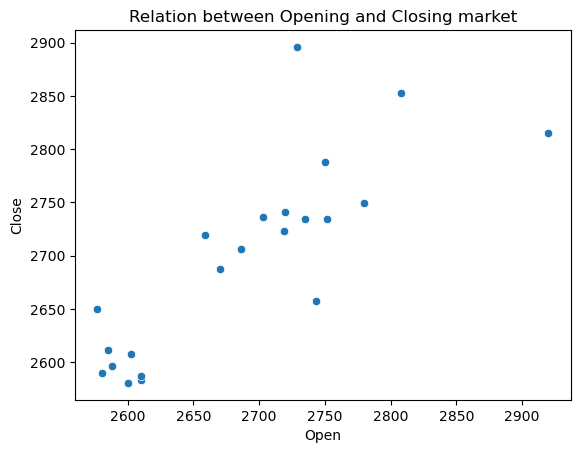

In [40]:
plt.title('Relation between Opening and Closing market')
sns.scatterplot(x = Jan_df['Open'], y = Jan_df['Close'])
plt.show()

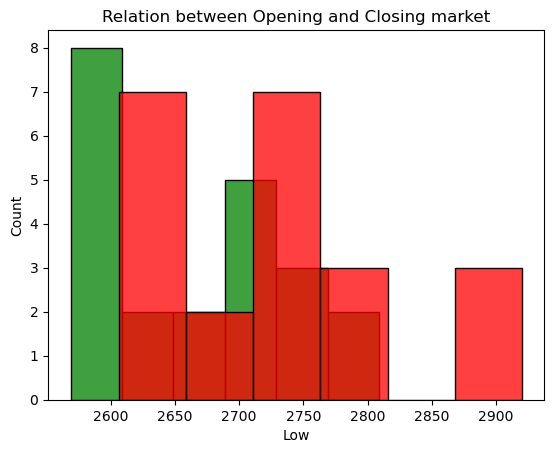

In [61]:
plt.title('Relation between Opening and Closing market')
sns.histplot(Jan_df['Low'], color='Green')
sns.histplot(Jan_df['High'], color='red')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


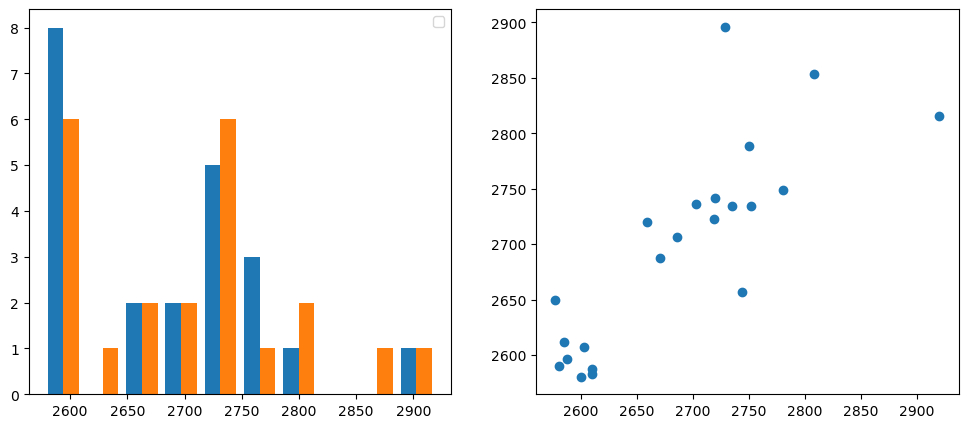

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))
ax1.legend()
ax1.hist(Jan_df[['Open', 'Close']])
ax2.scatter(x = Jan_df['Open'], y = Jan_df['Close'])